## Лабораторная работа №3. Обработка признаков (часть 2).
**Задание:**

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
1. масштабирование признаков (не менее чем тремя способами);
2. обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
3. обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
4. отбор признаков:
- один метод из группы методов фильтрации (filter methods);
- один метод из группы методов обертывания (wrapper methods);
- один метод из группы методов вложений (embedded methods).

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [43]:
data_loaded = pd.read_csv('../dataset.csv', sep=',', decimal=',')
data = data_loaded.rename(columns={
    "Area (sq. mi.)": "Area",
    "Pop. Density (per sq. mi.)" : "Density",
    "Coastline (coast/area ratio)": "Coastline",
    "Infant mortality (per 1000 births)": "Infant mortality",
    "GDP ($ per capita)": "GDP",
    "Literacy (%)": "Literacy",
    "Phones (per 1000)": "Phones"
}).dropna()
data.head()

,Country,Region,Population,Area,Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.000,0.000,23.060,163.070,700.000,36.000,3.200,12.130,0.220,87.650,1.000,46.600,20.340,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.600,1.260,-4.930,21.520,4500.000,86.500,71.200,21.090,4.420,74.490,3.000,15.110,5.220,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.800,0.040,-0.390,31.000,6000.000,70.000,78.100,3.220,0.250,96.530,1.000,17.140,4.610,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.100,59.800,10.760,21.030,8600.000,95.000,460.000,0.000,0.000,100.000,2.000,14.170,5.340,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.000,34.540,-6.150,19.460,11000.000,89.000,549.900,18.180,4.550,77.270,2.000,16.930,5.370,0.038,0.220,0.743


#### Маштабирование признаков

In [44]:
data_to_scale = data.drop(['Country', 'Region'], axis=1)
data_to_scale.describe()

,Population,Area,Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000
mean,34214149.520,564183.000,294.805,16.495,-0.207,38.898,9125.698,81.944,208.152,14.000,4.441,81.558,2.109,23.067,9.465,0.157,0.288,0.555
std,131763889.040,1395657.040,1379.353,73.978,4.751,35.353,9644.123,19.838,210.122,13.152,8.090,16.104,0.698,11.287,5.210,0.151,0.140,0.166
min,13477.000,28.000,1.800,0.000,-20.990,2.290,500.000,17.600,0.200,0.000,0.000,33.330,1.000,7.290,2.410,0.000,0.032,0.062
25%,1188580.500,19915.000,26.800,0.090,-1.315,9.990,1800.000,69.950,27.100,3.675,0.230,72.825,2.000,13.890,5.795,0.039,0.197,0.424
50%,6940432.000,118480.000,66.900,0.630,0.000,24.310,5100.000,90.900,137.100,10.530,1.030,86.070,2.000,20.460,7.840,0.101,0.274,0.559
75%,20860135.000,496441.000,164.700,5.355,0.395,64.605,12950.000,97.800,335.000,20.000,4.600,94.810,2.500,32.315,11.660,0.233,0.349,0.669
max,1313973713.000,9631420.000,16183.000,870.660,23.060,163.070,37800.000,100.000,898.000,62.110,48.960,100.000,4.000,50.730,29.740,0.769,0.906,0.954


##### На основе Z-оценки

In [45]:
scaler1 = StandardScaler()
data_scaled1 = pd.DataFrame(scaler1.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled1.describe()

,Population,Area,Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000
mean,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-0.260,-0.405,-0.213,-0.224,-4.387,-1.038,-0.897,-3.253,-0.992,-1.067,-0.550,-3.003,-1.594,-1.402,-1.358,-1.040,-1.830,-2.981
25%,-0.251,-0.391,-0.195,-0.222,-0.234,-0.820,-0.762,-0.606,-0.864,-0.787,-0.522,-0.544,-0.157,-0.815,-0.706,-0.781,-0.651,-0.787
50%,-0.208,-0.320,-0.166,-0.215,0.044,-0.414,-0.419,0.453,-0.339,-0.265,-0.423,0.281,-0.157,-0.232,-0.313,-0.370,-0.100,0.027
75%,-0.102,-0.049,-0.095,-0.151,0.127,0.729,0.398,0.802,0.605,0.457,0.020,0.825,0.562,0.822,0.422,0.504,0.436,0.690
max,9.740,6.515,11.551,11.579,4.911,3.522,2.982,0.913,3.292,3.668,5.518,1.148,2.718,2.458,3.902,4.056,4.417,2.418


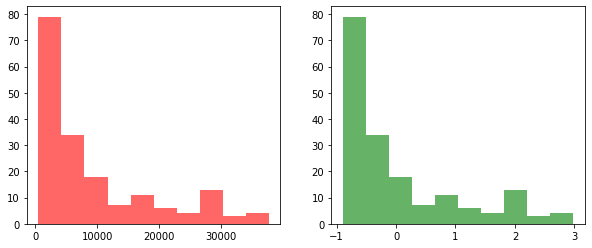

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["GDP"], color="r", alpha=0.6)
axs[1].hist(data_scaled1["GDP"], color="g", alpha=0.6)
plt.show()

##### MinMax-масштабирование

In [47]:
scaler2 = MinMaxScaler()
data_scaled2 = pd.DataFrame(scaler2.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled2.describe()

,Population,Area,Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000
mean,0.026,0.059,0.018,0.019,0.472,0.228,0.231,0.781,0.232,0.225,0.091,0.723,0.370,0.363,0.258,0.204,0.293,0.552
std,0.100,0.145,0.085,0.085,0.108,0.220,0.259,0.241,0.234,0.212,0.165,0.242,0.233,0.260,0.191,0.197,0.161,0.186
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.002,0.002,0.000,0.447,0.048,0.035,0.635,0.030,0.059,0.005,0.592,0.333,0.152,0.124,0.051,0.189,0.406
50%,0.005,0.012,0.004,0.001,0.477,0.137,0.123,0.890,0.152,0.170,0.021,0.791,0.333,0.303,0.199,0.131,0.277,0.557
75%,0.016,0.052,0.010,0.006,0.485,0.388,0.334,0.973,0.373,0.322,0.094,0.922,0.500,0.576,0.338,0.303,0.363,0.680
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


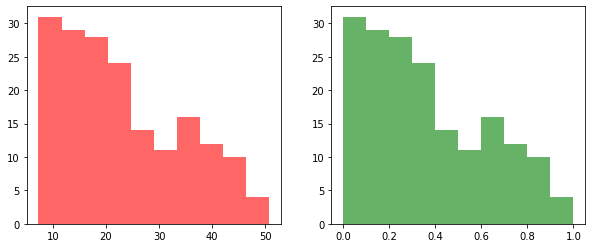

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["Birthrate"], color="r", alpha=0.6)
axs[1].hist(data_scaled2["Birthrate"], color="g", alpha=0.6)
plt.show()

##### По максимальному значению

In [49]:
scaler3 = MaxAbsScaler()
data_scaled3 = pd.DataFrame(scaler2.fit_transform(data_to_scale), columns=data_to_scale.columns)
data_scaled3.describe()

,Population,Area,Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000,179.000
mean,0.026,0.059,0.018,0.019,0.472,0.228,0.231,0.781,0.232,0.225,0.091,0.723,0.370,0.363,0.258,0.204,0.293,0.552
std,0.100,0.145,0.085,0.085,0.108,0.220,0.259,0.241,0.234,0.212,0.165,0.242,0.233,0.260,0.191,0.197,0.161,0.186
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.002,0.002,0.000,0.447,0.048,0.035,0.635,0.030,0.059,0.005,0.592,0.333,0.152,0.124,0.051,0.189,0.406
50%,0.005,0.012,0.004,0.001,0.477,0.137,0.123,0.890,0.152,0.170,0.021,0.791,0.333,0.303,0.199,0.131,0.277,0.557
75%,0.016,0.052,0.010,0.006,0.485,0.388,0.334,0.973,0.373,0.322,0.094,0.922,0.500,0.576,0.338,0.303,0.363,0.680
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


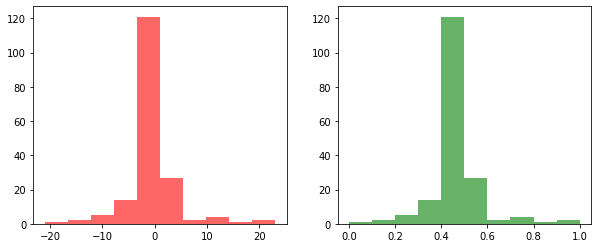

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(data["Net migration"], color="r", alpha=0.6)
axs[1].hist(data_scaled3["Net migration"], color="g", alpha=0.6)
plt.show()

#### Обработка выбросов

In [51]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [52]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df.mean() - (K1 * df.std())
        upper_boundary = df.mean() + (K1 * df.std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df.quantile(0.05)
        upper_boundary = df.quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df.quantile(0.75) - df.quantile(0.25)
        lower_boundary = df.quantile(0.25) - (K2 * IQR)
        upper_boundary = df.quantile(0.75) + (K2 * IQR)

    return lower_boundary, upper_boundary  

In [53]:
data2 = data_scaled3.copy()

##### Замена выбросов

OutlierBoundaryType.SIGMA


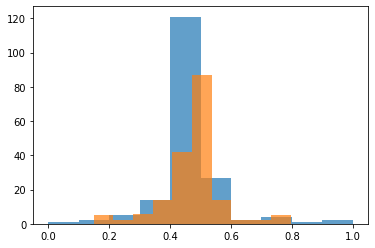

OutlierBoundaryType.QUANTILE


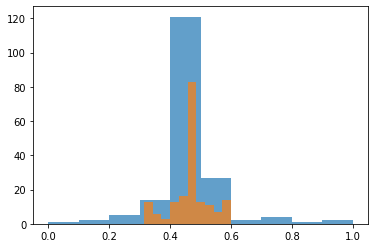

OutlierBoundaryType.IRQ


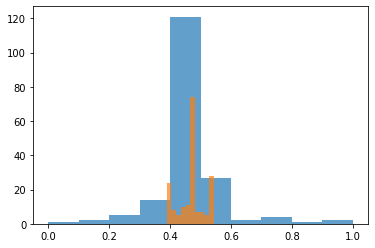

In [54]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled3['Net migration'], obt)
    data2['Net migration'] = np.where(data_scaled3['Net migration'] > upper_boundary, upper_boundary,
        np.where(data2['Net migration'] < lower_boundary, lower_boundary, data2['Net migration']))
    plt.hist(data_scaled3['Net migration'], alpha=0.7)
    plt.hist(data2['Net migration'], alpha=0.7)
    print(obt)
    plt.show()

##### Удаление выбросов

OutlierBoundaryType.SIGMA


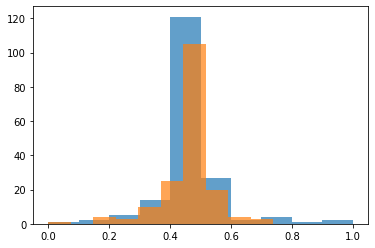

OutlierBoundaryType.QUANTILE


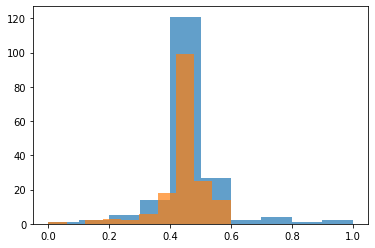

OutlierBoundaryType.IRQ


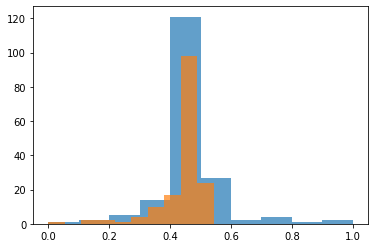

In [56]:
for obt in OutlierBoundaryType:
    lower_boundary, upper_boundary = get_outlier_boundaries(data_scaled3['Net migration'], obt)
    temp_df = np.where(data_scaled3['Net migration'] > upper_boundary, True,
        np.where(data2['Net migration'] < lower_boundary, True, False))
    data_trimmed = data_scaled3.loc[~(temp_df), ]
    plt.hist(data_scaled3['Net migration'], alpha=0.7)
    plt.hist(data_trimmed['Net migration'], alpha=0.7)
    print(obt)
    plt.show()

#### Отбор признаков

##### Удаление коррелирующих признаков

In [57]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.80]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [58]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [59]:
corr_groups(make_corr_df(data_trimmed))

[['Phones', 'GDP'],
 ['Arable (%)', 'Other (%)'],
 ['Birthrate', 'Infant mortality']]

##### Метод обёртывания

In [152]:
knn = KNeighborsClassifier(n_neighbors=3)

In [158]:
X_columns = ['Density', 'GDP', 'Birthrate', 'Literacy', 'Climate', 'Deathrate', 'Service']
Y1_columns = ['Region']
Y2_columns = ['Net migration']
X = data2[X_columns]
Y1 = np.ravel(np.where(data[Y1_columns] == 'BALTICS', 'EASTERN EUROPE',
    np.where(data[Y1_columns] == 'NORTHERN AFRICA', 'SUB-SAHARAN AFRICA',
    np.where(data[Y1_columns] == 'NORTHERN AMERICA', 'LATIN AMER. & CARIB', data[Y1_columns]))))
Y2 = np.ravel(data2[Y2_columns])

In [159]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, Y1)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset:', efs1.best_feature_names_)

Features: 91/91

Best accuracy score: 0.62
Best subset: ('Density', 'GDP', 'Climate', 'Deathrate')


##### Метод вложений

In [164]:
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X, Y1)
e_lr1.coef_

array([[ 7.98942693e+01, -3.24462704e+00, -4.73596956e+00,
        -1.86972210e+00, -5.28457061e-01, -2.49668022e+00,
        -6.65058880e+00],
       [-3.16664214e+02, -2.11757198e+01,  8.68059204e+00,
         9.31605760e+01,  3.73412996e+00,  1.09959856e+01,
        -6.87552437e+00],
       [-2.65113830e+01, -8.49645695e+00, -3.72344796e+01,
        -7.35406420e+00,  2.13564914e+00,  3.42759821e+00,
         9.12559722e+00],
       [-1.06248936e+01, -3.07284939e+00, -2.04399696e+00,
         2.42552375e+00, -1.22830530e+00, -7.18697864e+00,
         6.82528658e+00],
       [-1.95482587e+00,  6.34390106e+00,  7.51057444e+00,
        -3.52576792e+00, -2.63373379e+00, -2.65966558e+01,
        -2.94820614e+00],
       [-1.92566552e+02, -6.24877771e-01,  3.81686635e-01,
         1.60280324e+00,  1.20283381e-01, -8.09657572e+00,
         2.28591563e+00],
       [-1.47437447e+01, -3.09596291e+00,  3.55892895e+00,
        -2.74777586e+00,  3.96768560e-01,  6.86017615e+00,
         2.2223252

In [165]:
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X, Y1)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True])